# Programming Assignment 5 - Support Vector Machines 
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [32]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing the dataset:
The dataset we are using for this assignment is taken from UCI Machine Learning Repository. The dataset consists of Attributes/Factors that contribute to prediction of Diabetic Retinopathy(DR) in a diabetic patient. Given some predictors, we need to predict the value of target variable i.e. DR or Non-DR case. The dataset is given in the file data1.csv  

In [43]:
# TODO - Read the file into a pandas data frame - 5 points
df = pd.read_csv("Cryotherapy.csv")
print(df.shape)

(90, 7)


In [44]:
# TODO - Drop columns that have missing values - 5 points
df1 = df.dropna(axis="columns")
print(df1.shape)

(90, 7)


In [45]:
# TODO - Convert the df1 data frame into a numpy array named df2. Use values method of dataframes - 5 points
df2 = df1.values
print(df2.shape)

(90, 7)


In [46]:
# TODO - Select all rows and first 19 columns as X from df2 and select all rows and last column as Y from df2 - 5 points
print(df2)
X = df2[:, :6]
Y = df2[:, 6:].ravel()



[[1.000e+00 3.500e+01 1.200e+01 5.000e+00 1.000e+00 1.000e+02 0.000e+00]
 [1.000e+00 2.900e+01 7.000e+00 5.000e+00 1.000e+00 9.600e+01 1.000e+00]
 [1.000e+00 5.000e+01 8.000e+00 1.000e+00 3.000e+00 1.320e+02 0.000e+00]
 [1.000e+00 3.200e+01 1.175e+01 7.000e+00 3.000e+00 7.500e+02 0.000e+00]
 [1.000e+00 6.700e+01 9.250e+00 1.000e+00 1.000e+00 4.200e+01 0.000e+00]
 [1.000e+00 4.100e+01 8.000e+00 2.000e+00 2.000e+00 2.000e+01 1.000e+00]
 [1.000e+00 3.600e+01 1.100e+01 2.000e+00 1.000e+00 8.000e+00 0.000e+00]
 [1.000e+00 5.900e+01 3.500e+00 3.000e+00 3.000e+00 2.000e+01 0.000e+00]
 [1.000e+00 2.000e+01 4.500e+00 1.200e+01 1.000e+00 6.000e+00 1.000e+00]
 [2.000e+00 3.400e+01 1.125e+01 3.000e+00 3.000e+00 1.500e+02 0.000e+00]
 [2.000e+00 2.100e+01 1.075e+01 5.000e+00 1.000e+00 3.500e+01 0.000e+00]
 [2.000e+00 1.500e+01 6.000e+00 2.000e+00 1.000e+00 3.000e+01 1.000e+00]
 [2.000e+00 1.500e+01 2.000e+00 3.000e+00 1.000e+00 4.000e+00 1.000e+00]
 [2.000e+00 1.500e+01 3.750e+00 2.000e+00 3.000e+00

In [68]:
# Splitting the dataset into training and test data.
# TODO - Select first 600 rows as training dataset and the remaining rows as test dataset - 5 points
X_train = X[:60]
Y_train = Y[:60]
X_test = X[60:]
Y_test = Y[60:]

# Logistic Regression
First we will fit the dataset using a logistic regression model.

# Logistic Regression with Lasso (L1) Regularization.
Read the comments in the below cell carefully.
Try different values of parameter C.

In [69]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

In [70]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

In [71]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

In [72]:
# Complete the function logreg that accepts 'c' as a parameter, which is used to create logreg model 
# with different values of C.
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of penalty as 'L1'. By default, it is 'L2'.
    # Pass the value of C = c. Note that C is the inverse of lambda. So, small value of C i.e. b/w 0 and 1 
    # means stronger regularization and large value means less regularization.
    # Also, in sklearn, L1 is only supported with solver = 'saga'. Solver is the type of optimization algorithm like GDA or
    # SGDA, which is to be used. So, 'saga' is another algorithm like that. Pass the value of solver as 'saga'

    # TODO - Create the Logistic Regression model object as described above and save it to logreg - 5 points
    logreg = linear_model.LogisticRegression(penalty = "l1", C=c, solver = 'saga')
    
    # TODO - Fit the model on the training set - 5 points
    logreg.fit(X_train, Y_train)
    
    
    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg.append(c)

In [73]:
# Call the above function i.e. logreg_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.533333
Accuracy on test data = 0.533333
Accuracy on training data = 0.533333
Accuracy on test data = 0.533333
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.500000
Accuracy on training data = 0.466667
Accuracy on test data = 0.500000


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


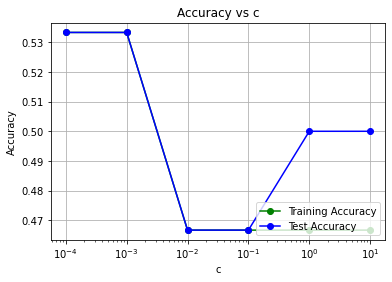

In [74]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

# IMP - Make sure you reinitialize c_logreg, acc_train_logreg and acc_test_logreg before rerunning logreg_model()
plt.plot(cVals, acc_train_logreg, color="green", marker="o")
plt.plot(cVals, acc_test_logreg, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")


# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# Logistic Regression with Ridge(L2) Regularization.

In [64]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg2 = []

In [65]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg2 = []

In [66]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg2 = []

In [68]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    # Create an object of logistic regression model using linear_model.
    # Pass the value of C=c.
    # You need not pass other parameters as penalty is 'L2' by default.
    
    # TODO - Create the Logistic Regression model object as described above and save it to logreg2 - 5 points
    logreg2 = linear_model.LogisticRegression(penalty = "l2", C=c, solver = 'saga')
    
    # TODO - Fit the model on the training set - 5 points
    logreg2.fit(X_train, Y_train)
    
    # TODO - Find the prediction on training set - 5 points
    Yhat_train = logreg2.predict(X_train)
    
    # Adding training accuracy to acc_train_logreg2
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    # TODO - Find the prediction on test set - 5 points
    Yhat_test = logreg2.predict(X_test)
    
    # Adding testing accuracy to acc_test_logreg2
    acc_test =logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    # Appending value of c for graphing purposes
    c_logreg2.append(c)
    

In [69]:
# Call the above function i.e. logreg_model with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    logreg2_model(c, X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.500000
Accuracy on training data = 0.466667
Accuracy on test data = 0.500000
Accuracy on training data = 0.466667
Accuracy on test data = 0.500000
Accuracy on training data = 0.466667
Accuracy on test data = 0.500000


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sa

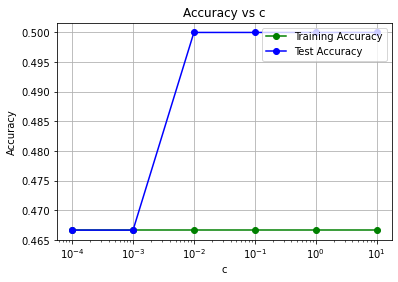

In [70]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

# IMP - Make sure you reinitialize c_logreg2, acc_train_logreg2 and acc_test_logreg2 before rerunning logreg2_model()

plt.plot(cVals, acc_train_logreg2, color="green", marker="o")
plt.plot(cVals, acc_test_logreg2, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Logistic Regression Using Polynomial Feature Transformation
Refer the given link to know how we can transform features.<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
# TODO - Create an object of PolynomialFeatures(2) - 5 points
poly = PolynomialFeatures(2)

In [74]:
# TODO - Create the transformed data matrices for training and test using poly.fit_transform(..) - 5 points
X_transformed_train = poly.fit_transform(X_train, Y_train)
X_transformed_test = poly.fit_transform(X_test, Y_test)

In [75]:
# CHECK - the shapes of the new matrices - should have 210 features
print(X_transformed_train.shape)
print(X_transformed_test.shape)

(60, 28)
(30, 28)


Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sa

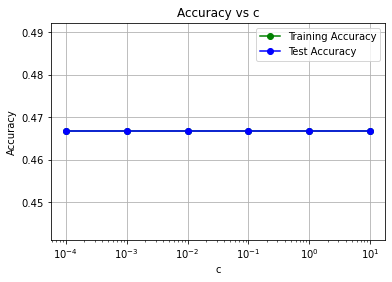

In [76]:
# Calling the logreg_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) because these lists are global variables.

acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# Call the function logreg_model.
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
# Use the code that you wrote to draw the plot for logreg_model()
plt.plot(cVals, acc_train_logreg, color="green", marker="o")
plt.plot(cVals, acc_test_logreg, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667
Accuracy on training data = 0.466667
Accuracy on test data = 0.466667


/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sa

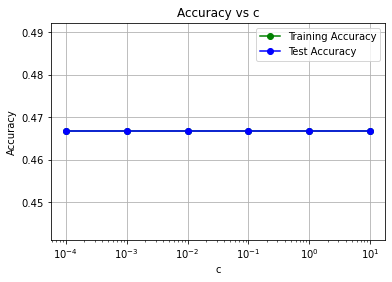

In [77]:
# Calling the logreg2_model(..) using transformed features.
# Pass c, X_transformed_train , Y_train, X_transformed_test, Y_test
# Before calling the function, we need to re-initialize the 3 lists in which we append the 
# results (accuracy) beacause these list are global varibles.

acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

# Call the function logreg2_model.
for c in cVals:
    logreg2_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)
    
# Write code to plot 2 plots.
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
# Use the code that you wrote to draw the plot for logreg2_model()
plt.plot(cVals, acc_train_logreg2, color="green", marker="o")
plt.plot(cVals, acc_test_logreg2, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Note:
<u>Do not</u> use these transformed features for the further part of the assignment. Use the X_train, Y_train, X_test and Y_test matrices.

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [78]:
acc_train_svm_linear = []

In [79]:
acc_test_svm_linear = []

In [80]:
c_svm_linear = []

In [1]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc_linear = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_linear.fit(X_train, Y_train)
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)
    

In [82]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.683333
Test Accuracy = 0.700000
Train Accuracy = 0.800000
Test Accuracy = 0.833333
Train Accuracy = 0.900000
Test Accuracy = 0.866667
Train Accuracy = 0.933333
Test Accuracy = 0.833333
Train Accuracy = 0.950000
Test Accuracy = 0.900000
Train Accuracy = 0.950000
Test Accuracy = 0.900000


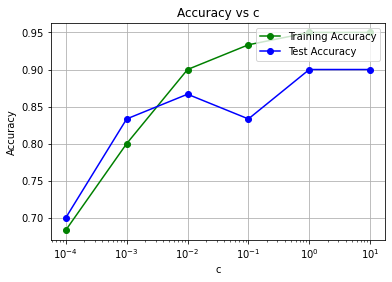

In [83]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(cVals, acc_train_svm_linear, color="green", marker="o")
plt.plot(cVals, acc_test_svm_linear, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

Change the value of parameter C above and see the difference in the results.

# SVM using Radial Basis Function(RBF) Kernel.

In [96]:
acc_train_svm_rbf = []

In [97]:
acc_test_svm_rbf = []

In [98]:
c_svm_rbf = []

In [99]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c) - 5 points
    svc_rbf = svm.SVC(probability = False, kernel = "rbf", C= c )
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_rbf.fit(X_train, Y_train)
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)
    

In [100]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    svm_rbf(c)

Train Accuracy = 0.533333
Test Accuracy = 0.533333
Train Accuracy = 0.533333
Test Accuracy = 0.533333
Train Accuracy = 0.533333
Test Accuracy = 0.533333
Train Accuracy = 0.533333
Test Accuracy = 0.533333
Train Accuracy = 0.633333
Test Accuracy = 0.633333
Train Accuracy = 0.833333
Test Accuracy = 0.800000


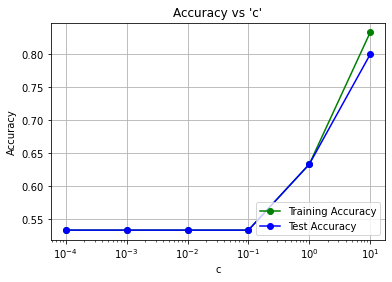

In [101]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(cVals, acc_train_svm_rbf, color="green", marker="o")
plt.plot(cVals, acc_test_svm_rbf, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs 'c'")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

Change the value of parameter C and gamma above and see the difference in the results. 

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [102]:
acc_train_svm_poly = []

In [103]:
acc_test_svm_poly = []

In [104]:
c_svm_poly = []

In [105]:
def svm_polynomial(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'poly', C = c) - 5 points
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train[0:300,:]  # First 300 rows of training set.
    B = Y_train[0:300]  
    C = X_test[0:100,:]   # First 100 rows of test set.
    D = Y_test[0:100]
    
    # TODO - Fit the classifier on the training set - 5 points
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(A,B)
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_poly_train = svc_polynomial.predict(A)
    acc_train = svc_polynomial.score(A, B)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_poly_test = svc_polynomial.predict(C)
    acc_test = svc_polynomial.score(C, D)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)
    

In [106]:
# Call the above function i.e. svm_poly with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
# Redefining cVals because poly takes a long time to run with larger values of c since 
# the larger the value of c, the lesser the amount of regulatization
cVals = np.geomspace(0.000001, 0.001, 5)
for c in cVals:
    svm_polynomial(c)

Train Accuracy = 0.533333
Test Accuracy = 0.533333
Train Accuracy = 0.533333
Test Accuracy = 0.533333
Train Accuracy = 0.533333
Test Accuracy = 0.533333
Train Accuracy = 0.566667
Test Accuracy = 0.566667
Train Accuracy = 0.566667
Test Accuracy = 0.566667


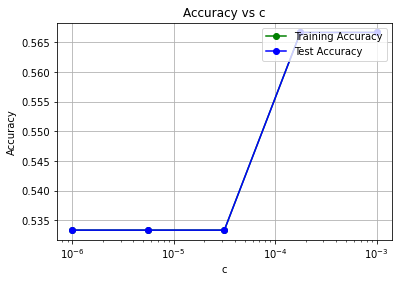

In [107]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
plt.plot(cVals, acc_train_svm_poly, color="green", marker="o")
plt.plot(cVals, acc_test_svm_poly, color="blue", marker="o")
plt.xscale("log")
plt.grid()
plt.xlabel("c")
plt.ylabel("Accuracy")
plt.title("Accuracy vs c")
# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

Change the value of parameter C and see the difference in the results.

# Repeating the Assignment with 2 more Datasets:
1) Cryotherapy.csv (Predict result of treatment using 6 predictors).<br>
2) Immunotherapy.csv (Predict result of treatment using 7 predictors).
### You have to repeat the full assignment with 2 more different datasets. You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment. For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter. You have to write this for all the 3 datasets in a single pdf file. Do not write explainations, just discuss your results / observations point to point. (10 points each)